# Preliminary Analysis
## for KidKit

## Data Wrangling

> The original dataset reports domestic flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008.

> Data is available at the http://stat-computing.org/dataexpo/2009/the-data.html originally from https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp described in detail here https://www.transtats.bts.gov/Fields.asp?Table_ID=236

In [8]:
# import modules
import pandas as pd
import numpy as np
import calendar
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [24]:
df_88 = pd.read_csv('1988.csv', nrows=None, encoding='latin-1')

In [9]:
#read entire datasets, three of them - one for every dacade
df_88 = pd.read_csv('1988.csv', nrows=None, encoding='latin-1')
df_98 = pd.read_csv('1998.csv', nrows=None, encoding='latin-1')
df_08 = pd.read_csv('2008.csv', nrows=None, encoding='latin-1')
df_88.shape, df_98.shape, df_08.shape 

((5202096, 29), (5384721, 29), (7009728, 29))

### What is the structure of our dataset?

> We have selected three datasets to show how delays have evolved last thirty years in the aviation industry and perhaps get some insights about how to handle critical aviation operations linked to higher volume of flights This is because the first two datasets representing 5 million records each, demonstrate there has not been a significant change in flights volume. In the 2008 dataset a significant increase in the dataset records raise questions how this 30% increase has been handled by the actual aviation system and is so, there has been a direct impact in the passenger experience with respect to flight delays.

### What are the main feature of interest in our dataset?

> As explained before an increase in flight demand, must have altered aviation system's supply operations. Out of the 27 features - columns of our dataset We will focus on the delayed fligts or delays in general. However further investigation has to be performed with respect to cancelled flights, taxi  and local trasportation as well as including operations to final destinations. Other interesting information is provided and can be further eplored to improve passenger experience and further explore the success of innovative business models in the aviation industry. This can provide inderesting insights from the operations management prespective as well a comprehensive understanding of the operational cost for being idle. Carrier delay data can be thus analyzed, something we are not providing here.

### What features in the dataset that will help support our investigation into our features of interest?

> For the sake of this analyses we will be analysing 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay'and 'LateAircraftDelay'. 'ArrDelay' which is the delay of flights arrival in the case this is true is the sum in minutes of the following variables 'CarrierDelay' 'WeatherDelay', 'NASDelay', 'SecurityDelay' and 'LateAircraftDelay' aka, Carrier Delay, Weather Delay, National Airline System Delay, Security Delay and Late Aircraft Delay.

### Update Dataset

> We are now focussing on the part of the delayed flights so we have to drop from our dataset null values assuming empty records for delayed flights are the flights that arrive on time. Additionally, we only keep columns we are interested in, thus 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay'and 'LateAircraftDelay'

In [ ]:
#Let's have a look at our field names
df_98.columns

In [ ]:
#Let's visualize nulls in 1988 dataset in a seaborn barplot
plt.figure(figsize = (15,5))
na_counts = df_88.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color=base_color)
locs, labels = plt.xticks() 
plt.xticks(np.arange(len(df_88.columns)), df_88.columns, rotation=90);

In [ ]:
#Let's visualize nulls in 1998 dataset in a seaborn barplot
plt.figure(figsize = (15,5))
na_counts = df_98.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color=base_color)
locs, labels = plt.xticks() 
plt.xticks(np.arange(len(df_98.columns)), df_98.columns, rotation=90);

In [ ]:
#Let's visualize nulls in 2008 dataset in a seaborn barplot
plt.figure(figsize = (15,5))
na_counts = df_98.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color=base_color)
locs, labels = plt.xticks() 
plt.xticks(np.arange(len(df_98.columns)), df_98.columns, rotation=90);

In [ ]:
#Check the ammount of ArrDelay in all three datasets
df_88.ArrDelay.sum(), df_98.ArrDelay.sum(), df_08.ArrDelay.sum()

In [ ]:
#Check mean ArrDelay in all three datasets
df_88.ArrDelay.mean(), df_98.ArrDelay.mean(), df_08.ArrDelay.mean()

## Variables NAN exploration and data comprehension 

> 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay'and 'LateAircraftDelay' are the columns we are mostly interested in. We have a great deal of information however it seems we started collecting more dettailed data about 'ArrDelay' after 1998. The reason we started collecting this kind of data could be the increased volume of flights, complexity of operations or even simly we tried to further explore our aviation systems. We also started collecting TaxiIn and TaxiOut information sometime after 1988 and before 1998. It is interesting to further explore why Air time is stored two times!

In [ ]:
#colums to keep
fields = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrDelay', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay' ]

In [ ]:
#columns to drop 
#In this particular phase we are so lucky all our column names are the same in all datasets
fields_to_drop = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum', 
                  'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'DepDelay', 'Origin', 'Dest', 'Distance', 
                  'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted']
df_88.drop(fields_to_drop,axis=1,inplace=True)
df_98.drop(fields_to_drop,axis=1,inplace=True)
df_08.drop(fields_to_drop,axis=1,inplace=True)

In [ ]:
#check datatypes for 1988 dataset
df_88.info()

In [ ]:
#check datatypes for 1998 dataset
df_98.info()

In [ ]:
#check datatypes for 2008 dataset
df_08.info()

## Fix Datetime for better data manipulation

> 'Year', 'Month', 'DayofMonth', 'DayOfWeek', provide insightful information so parsing this as datetime can make our life easier in terms of data manipulation

In [ ]:
#Get unique values of how our month column is distributed
df_88.Month.unique()

In [ ]:
#understand how month_names are listed in the calendar package we want to use
list(calendar.month_name)

In [ ]:
#Get unique values of how our DayOfWeek column is distributed
df_88.DayOfWeek.unique()

In [ ]:
#understand how day_names are listed in the calendar package we want to use
list(calendar.day_name)

In [15]:
df_88[df_88.ArrDelay.isna() == True].Month.value_counts()

1     18060
2      8585
12     5980
11     4568
7      4203
3      4178
8      3737
5      3698
4      3478
10     3129
9      2846
6      2137
Name: Month, dtype: int64

In [11]:
#I use calendar package to parse months by name, and create my x axis for visualizing my barplot
df_88[df_88.ArrDelay.isna() == True] = df_88[df_88.ArrDelay.isna() == True].Month.apply(lambda x: calendar.month_name[x])
#I want to see how many delays I have for each month in my null delayed dataset, and create y value for barplot
df_88[df_88.ArrDelay.isna() == True] = df_88[df_88.ArrDelay.isna() == True].Month.value_counts()



ValueError: Must have equal len keys and value when setting with an iterable

In [ ]:
#to fit in the length of the calendal.day_name we need to subtrack 1 sonce python starts counting from 0 not 1
df_88.DayOfWeek = df_88.DayOfWeek.apply(lambda x: calendar.day_name[x-1])

In [ ]:
#to fit in the length of the calendal.day_name we need to subtrack 1 sonce python starts counting from 0 not 1
df_88.DayOfWeek = df_88.DayOfWeek.apply(lambda x: calendar.day_name[x-1])

In [ ]:
#I want to see which months are present in my null delayed dataset, and create an x-axes for my barplot
#I use unique() to do this
df_88[df_88.ArrDelay.isna() == True].Month.unique()

In [ ]:
#I want to see how many delays I have for each munth in my null delayed dataset
df_88[df_88.ArrDelay.isna() == True].Month.value_counts()

In [20]:
df_88[df_88.ArrDelay.isna() == True].Month.apply(lambda x: calendar.month_name[x])

28          January
35          January
67          January
79          January
139         January
168         January
193         January
196         January
204         January
207         January
219         January
222         January
228         January
245         January
246         January
248         January
250         January
256         January
271         January
274         January
280         January
282         January
285         January
298         January
302         January
309         January
335         January
346         January
351         January
364         January
             ...   
5197450    December
5197483    December
5197484    December
5197490    December
5197504    December
5197516    December
5197523    December
5197584    December
5197585    December
5197592    December
5197603    December
5197629    December
5197751    December
5197764    December
5197810    December
5197840    December
5197871    December
5198101    December
5198127    December


In [21]:
df_88[df_88.ArrDelay.isna() == True].Month.value_counts()

1     18060
2      8585
12     5980
11     4568
7      4203
3      4178
8      3737
5      3698
4      3478
10     3129
9      2846
6      2137
Name: Month, dtype: int64

In [23]:
df_88[df_88.ArrDelay.isna() == True].Month.apply(lambda x: calendar.month_name[x]).unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

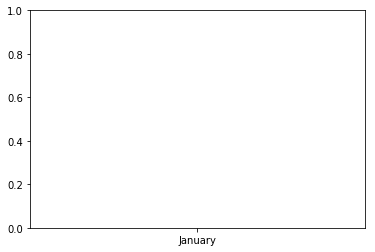

In [26]:
#I create a barplot using the above information
#I use calendar package to parse months by name, and create my x axis for visualizing my barplot
#I want to see how many delays I have for each month in my null delayed dataset, and create y value for barplot
plt.bar(df_88[df_88.ArrDelay.isna() == True].Month.apply(lambda x: calendar.month_name[x]), df_88[df_88.ArrDelay.isna() == True].Month.value_counts());
locs, labels = plt.xticks() #set locaction and labels for xticks
plt.xticks(np.arange(12), df_88[df_88.ArrDelay.isna() == True].Month.apply(lambda x: calendar.month_name[x]).unique(), rotation=90); #specify where xsticks should be, their names and rodation

In [ ]:
#Get some visual insights about NANs in the 'ArrDelay' feature for 1988 dataset
plt.figure(figsize = [15,5])

plt.subplot(1, 3, 1)
plt.bar(df_88[df_88.ArrDelay.isna() == True].Month, df_88[df_88.ArrDelay.isna() == True].Month.value_counts)

plt.subplot(1, 3, 2)
plt.hist(df_88[df_88.ArrDelay.isna() == True].DayofMonth)

plt.subplot(1, 3, 3)
plt.hist(df_88[df_88.ArrDelay.isna() == True].DayOfWeek)

plt.show()

In [ ]:
#Get some visual insights about NANs in the 'ArrDelay' feature for 1998 dataset
plt.figure(figsize = [15,5])

plt.subplot(1, 3, 1)
plt.hist(df_98[df_98.ArrDelay.isna() == True].Month)

plt.subplot(1, 3, 2)
plt.hist(df_98[df_98.ArrDelay.isna() == True].DayofMonth)

plt.subplot(1, 3, 3)
plt.hist(df_98[df_98.ArrDelay.isna() == True].DayOfWeek)

plt.show()

In [ ]:
#Get some visual insights about NANs in the 'ArrDelay' feature for 1998 dataset
plt.figure(figsize = [15,5])

plt.subplot(1, 3, 1)
plt.hist(df_08[df_08.ArrDelay.isna() == True].Month)

plt.subplot(1, 3, 2)
plt.hist(df_08[df_08.ArrDelay.isna() == True].DayofMonth)

plt.subplot(1, 3, 3)
plt.hist(df_08[df_08.ArrDelay.isna() == True].DayOfWeek)

plt.show()

In [ ]:
# drop rows with null values in the 'ArrDelay' field in all datasets
df_88.dropna(subset = ['ArrDelay'], inplace = True)
df_98.dropna(subset = ['ArrDelay'], inplace = True)
df_08.dropna(subset = ['ArrDelay'], inplace = True)
df_88.shape, df_98.shape, df_08.shape

In [ ]:
#Reassign df_88 to delayed-only flights and show the shape of delayed flights in 1988
df_88 = df_88[df_88.ArrDelay > 0]
df_88.shape

In [ ]:
#Reassign df_98 to delayed-only flights and show the shape of delayed flights in 1998
df_98 = df_98[df_98.ArrDelay > 0]
df_98.shape

In [ ]:
#Reassign df_08 to delayed-only flights and show the shape of delayed flights in 2008
df_08 = df_08[df_08.ArrDelay > 0]
df_08.shape

In [ ]:
#Check 1988 NAN values
df_88.isna().sum()

In [ ]:
#Check 1998 NAN values
df_98.isna().sum()

In [ ]:
#Check 2008 NAN values
df_08.isna().sum()

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [ ]:
df_88.hist(figsize = [15,15]);

In [ ]:
df_98.hist(figsize = [15,15]);

In [ ]:
df_08.hist(figsize = [15,15]);

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!